Sustain cv check for adni.

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import json 
import pickle
# Import pySuStaIn modules
from pySuStaIn.MixtureSustain import MixtureSustain
from kde_ebm.mixture_model import fit_all_gmm_models, fit_all_kde_models
import time
import numpy as np
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import StratifiedKFold
import bebms.utils as utils

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
data_file = '../adni.csv'
df = pd.read_csv(data_file)
df.drop(columns=['participant'], inplace=True)
df.head()

,ADAS13,MMSE,RAVLT_immediate,ABETA,TAU,PTAU,VentricleNorm,HippocampusNorm,WholeBrainNorm,EntorhinalNorm,FusiformNorm,MidTempNorm,diseased
0,31.00,20.0,22.0,741.5,239.7,22.83,0.044046,0.002769,0.588242,0.000932,0.008073,0.009591,1
1,21.33,27.0,37.0,1501.0,153.1,13.29,0.023582,0.004090,0.687717,0.002372,0.011335,0.011679,1
2,14.67,29.0,37.0,547.3,337.0,33.43,0.020760,0.004312,0.680552,0.002702,0.015108,0.013173,0
3,24.33,24.0,20.0,357.4,329.9,31.26,0.018230,0.003728,0.702525,0.001819,0.011393,0.013418,1
4,8.33,29.0,45.0,1582.0,203.6,16.68,0.036453,0.005301,0.678788,0.002821,0.010854,0.014019,0


In [15]:
biomarker_labels = list(df.columns)[:-1]
data_matrix = df.to_numpy()
data = data_matrix[:, :-1].astype(np.float64)
# data = scaler.fit_transform(data)
target = data_matrix[:, -1].astype(np.int64)
data.shape

(726, 12)

In [16]:
# The user chooses the type
sustainType = 'mixture_GMM'  # or 'mixture_KDE', 'mixture_GMM'

# Then the appropriate mixture model is fitted
if sustainType == "mixture_GMM":
    mixtures = fit_all_gmm_models(data, target)
elif sustainType == "mixture_KDE":
    mixtures = fit_all_kde_models(data, target)

# Extract likelihoods for each biomarker
L_yes = np.zeros(data.shape)
L_no = np.zeros(data.shape)
for i in range(data.shape[1]):
    if sustainType == "mixture_GMM":
        L_no[:, i], L_yes[:, i] = mixtures[i].pdf(None, data[:, i])
    elif sustainType == "mixture_KDE":
        L_no[:, i], L_yes[:, i] = mixtures[i].pdf(data[:, i].reshape(-1, 1))

/home/hhao9/miniconda/envs/jobs/lib/python3.9/site-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


In [17]:
output_folder = os.path.join(os.getcwd(), "sustain_results_gmm")
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [18]:
N_startpoints = 25  # Number of starting points for optimization
N_S_max = 6  # Maximum number of subtypes (since you mentioned 2 orderings)
N_iterations_MCMC = int(1e5) 
dataset_name = 'adni'
use_parallel_startpoints = True
N_folds = 5

49min 37.1s

In [19]:
sustain_model = MixtureSustain(
        L_yes, 
        L_no, 
        biomarker_labels,  # biomarker labels
        N_startpoints, 
        N_S_max, 
        N_iterations_MCMC, 
        output_folder, 
        dataset_name, 
        use_parallel_startpoints
    )
# Stratified CV folds
cv = StratifiedKFold(n_splits=N_folds, shuffle=True)
test_idxs = [test.astype(int) for _, test in cv.split(data, target)]

# Perform cross-validation
CVIC, loglike_matrix = sustain_model.cross_validate_sustain_model(test_idxs)

Folds:   0%|          | 0/5 [00:00<?, ?it/s]

Finding ML solution to 1 cluster problem
Overall ML likelihood is -12896.227486130469


MCMC Iteration: 100%|██████████| 100000/100000 [00:19<00:00, 5068.81it/s]


Splitting cluster 1 of 1
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12632.27518753]
Overall ML likelihood is [-12632.27518753]


MCMC Iteration: 100%|██████████| 100000/100000 [00:45<00:00, 2195.58it/s]


Splitting cluster 1 of 2
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12572.6984702]
Splitting cluster 2 of 2
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12574.04166988]
Overall ML likelihood is [-12572.6984702]


MCMC Iteration: 100%|██████████| 100000/100000 [01:04<00:00, 1557.70it/s]


Splitting cluster 1 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12550.33372244]
Splitting cluster 2 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12543.04892936]
Splitting cluster 3 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12543.75726368]
Overall ML likelihood is [-12543.04892936]


MCMC Iteration: 100%|██████████| 100000/100000 [01:15<00:00, 1324.55it/s]


Splitting cluster 1 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12520.93512095]
Splitting cluster 2 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12517.78140124]
Splitting cluster 3 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12524.04669252]
Splitting cluster 4 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12520.93064343]
Overall ML likelihood is [-12517.78140124]


MCMC Iteration: 100%|██████████| 100000/100000 [01:29<00:00, 1119.40it/s]


Splitting cluster 1 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12511.79333909]
Splitting cluster 2 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12514.00897792]
Splitting cluster 3 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12517.7863708]
Splitting cluster 4 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12511.81701254]
Splitting cluster 5 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12517.12393822]
Overall ML likelihood is [-12511.79333909]


Folds:  20%|██        | 1/5 [10:37<42:31, 637.91s/it]

Finding ML solution to 1 cluster problem
Overall ML likelihood is -12824.741039498067


MCMC Iteration: 100%|██████████| 100000/100000 [00:20<00:00, 4889.68it/s]


Splitting cluster 1 of 1
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12601.70052968]
Overall ML likelihood is [-12601.70052968]


MCMC Iteration: 100%|██████████| 100000/100000 [00:47<00:00, 2085.77it/s]


Splitting cluster 1 of 2
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12560.07694277]
Splitting cluster 2 of 2
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12556.56844335]
Overall ML likelihood is [-12556.56844335]


MCMC Iteration: 100%|██████████| 100000/100000 [01:01<00:00, 1628.09it/s]


Splitting cluster 1 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12551.76459642]
Splitting cluster 2 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12524.65238702]
Splitting cluster 3 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12524.05405093]
Overall ML likelihood is [-12524.05405093]


MCMC Iteration: 100%|██████████| 100000/100000 [01:51<00:00, 894.29it/s]


Splitting cluster 1 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12517.15139437]
Splitting cluster 2 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12515.16483284]
Splitting cluster 3 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12516.36151116]
Splitting cluster 4 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12515.16302606]
Overall ML likelihood is [-12515.16302606]


MCMC Iteration: 100%|██████████| 100000/100000 [01:26<00:00, 1160.70it/s]


Splitting cluster 1 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12506.74630074]
Splitting cluster 2 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12514.51970242]
Splitting cluster 3 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12514.64488974]
Splitting cluster 4 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12506.72602312]
Splitting cluster 5 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12502.73513202]
Overall ML likelihood is [-12502.73513202]


Folds:  40%|████      | 2/5 [21:55<33:04, 661.36s/it]

Finding ML solution to 1 cluster problem
Overall ML likelihood is -12811.531606806635


MCMC Iteration: 100%|██████████| 100000/100000 [00:21<00:00, 4737.79it/s]


Splitting cluster 1 of 1
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12561.42334437]
Overall ML likelihood is [-12561.42334437]


MCMC Iteration: 100%|██████████| 100000/100000 [00:48<00:00, 2064.49it/s]


Splitting cluster 1 of 2
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12525.57310377]
Splitting cluster 2 of 2
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12517.40281642]
Overall ML likelihood is [-12517.40281642]


MCMC Iteration: 100%|██████████| 100000/100000 [01:01<00:00, 1629.83it/s]


Splitting cluster 1 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12487.61536634]
Splitting cluster 2 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12477.91884926]
Splitting cluster 3 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12477.92279458]
Overall ML likelihood is [-12477.91884926]


MCMC Iteration: 100%|██████████| 100000/100000 [01:15<00:00, 1331.74it/s]


Splitting cluster 1 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12469.58085627]
Splitting cluster 2 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12465.30991271]
Splitting cluster 3 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12474.6973612]
Splitting cluster 4 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12465.11876675]
Overall ML likelihood is [-12465.11876675]


MCMC Iteration: 100%|██████████| 100000/100000 [01:27<00:00, 1137.22it/s]


Splitting cluster 1 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12458.36397781]
Splitting cluster 2 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12462.75362977]
Splitting cluster 3 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12459.65485824]
Splitting cluster 4 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12459.30653639]
Splitting cluster 5 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12459.27932678]
Overall ML likelihood is [-12458.36397781]


Folds:  60%|██████    | 3/5 [32:17<21:26, 643.33s/it]

Finding ML solution to 1 cluster problem
Overall ML likelihood is -12886.893092664743


MCMC Iteration: 100%|██████████| 100000/100000 [00:19<00:00, 5205.87it/s]


Splitting cluster 1 of 1
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12617.65263844]
Overall ML likelihood is [-12617.65263844]


MCMC Iteration: 100%|██████████| 100000/100000 [00:45<00:00, 2174.13it/s]


Splitting cluster 1 of 2
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12577.23549638]
Splitting cluster 2 of 2
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12568.89050806]
Overall ML likelihood is [-12568.89050806]


MCMC Iteration: 100%|██████████| 100000/100000 [00:58<00:00, 1711.92it/s]


Splitting cluster 1 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12518.48155261]
Splitting cluster 2 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12532.01155951]
Splitting cluster 3 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12533.87841516]
Overall ML likelihood is [-12518.48155261]


MCMC Iteration: 100%|██████████| 100000/100000 [01:10<00:00, 1425.88it/s]


Splitting cluster 1 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12517.68023443]
Splitting cluster 2 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12503.49958658]
Splitting cluster 3 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation


Folds:  60%|██████    | 3/5 [37:08<24:45, 742.86s/it]


KeyboardInterrupt: 

In [9]:
# CVIC = np.array([
#     11084.14850994, 10446.74142007, 10307.71143128, 
#     10230.83791672, 10205.47185999, 10172.8120821 ])

array([11084.14850994, 10446.74142007, 10307.71143128, 10230.83791672,
       10205.47185999, 10172.8120821 ])

In [10]:
ml_n_subtypes = utils.choose_optimal_subtypes(CVIC)
print(ml_n_subtypes)

6


   n_subtypes          CVIC
0           1  11084.148510
1           2  10446.741420
2           3  10307.711431
3           4  10230.837917
4           5  10205.471860
5           6  10172.812082


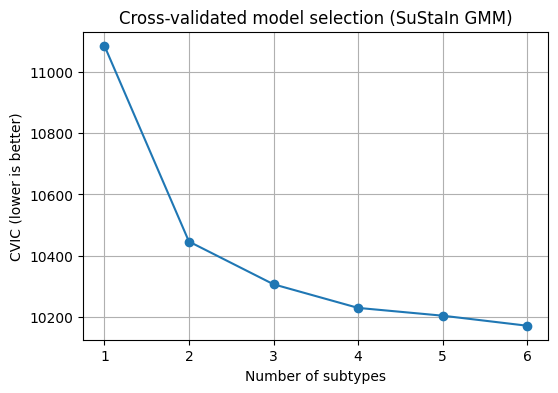

In [ ]:
# Summarize results
df_cvic = pd.DataFrame({
    "n_subtypes": np.arange(1, 7),
    "CVIC": CVIC
})
print(df_cvic)

# Plot CVIC curve
plt.figure(figsize=(6,4))
plt.plot(df_cvic["n_subtypes"], df_cvic["CVIC"], marker="o")
plt.xlabel("Number of subtypes")
plt.ylabel("CVIC (lower is better)")
plt.title("Cross-validated model selection (SuStaIn GMM)")
plt.grid(True)
plt.savefig(f"sustain_ordering_gmm/cross_validataion.pdf", bbox_inches="tight", dpi=300)
plt.savefig(f"sustain_ordering_gmm/cross_validataion.png", bbox_inches="tight", dpi=300)
plt.show()